Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

Upload your notebook to Github and submit the URL for this assignment.

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
hurricane_df = pd.read_csv('datasets/hurricaneMichael.csv')

In [3]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [7]:
def getDate(col):
    #get YYYY-MM-DD value
    date = col.split(" ")[0]
    
    #extract year from date
    dt = datetime.strptime(date, '%m/%d/%Y')
    return dt

In [8]:
hurricane_df["Date"] = hurricane_df["Date"].apply(getDate)

In [9]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,2018-10-06,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,2018-10-06,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,2018-10-06,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,2018-10-07,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,2018-10-07,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [10]:
hurricane_df['Long'] = 0 - hurricane_df['Long']

In [11]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,2018-10-06,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,2018-10-06,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,2018-10-06,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,2018-10-07,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,2018-10-07,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [12]:
hurricane_df.isna().sum()

AdvisoryNumber    0
Date              0
Lat               0
Long              0
Wind              0
Pres              0
Movement          0
Type              0
Name              0
Received          0
Forecaster        0
dtype: int64

In [15]:
# the point function takes longitude first 
hurricane_df['Coordinates'] = list(hurricane_df[['Long','Lat']].values)

In [16]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018-10-06,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,2018-10-06,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,2018-10-06,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,2018-10-07,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,"[-87.1, 18.4]"
4,3,2018-10-07,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,"[-86.9, 18.6]"


In [17]:
#convert the coordinates to a geolocation type
hurricane_df['Coordinates'] = hurricane_df['Coordinates'].apply(Point)

In [18]:
#coordinates column now has POINT next to each coordinate pair value
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018-10-06,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,2018-10-06,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,2018-10-06,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,2018-10-07,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,2018-10-07,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)


In [19]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_hurricane = gpd.GeoDataFrame(hurricane_df, geometry='Coordinates')

In [20]:
#geo-dataframe looks the same as regular dataframe
geo_hurricane.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,2018-10-06,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,2018-10-06,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,2018-10-06,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,2018-10-07,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,2018-10-07,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)


In [21]:
#verify coordinates column is geolocation data type
type(geo_hurricane['Coordinates'])

geopandas.geoseries.GeoSeries

In [22]:
type(geo_hurricane['Date'])

pandas.core.series.Series

### Import the map of the US 

In [24]:
#import file that contains a US map shape polygons
filepath = "datasets/US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


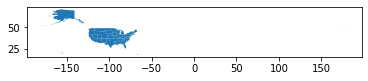

In [25]:
map_df.plot()

In [26]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

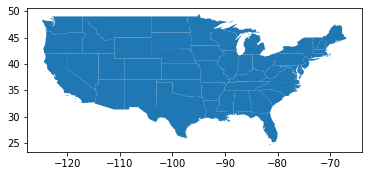

In [27]:
map48.plot()

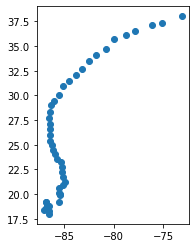

In [28]:
# the location data regarding the hurricane's path 
geo_hurricane.plot()

Text(0.5, 1, 'Path of Hurricane Michael')

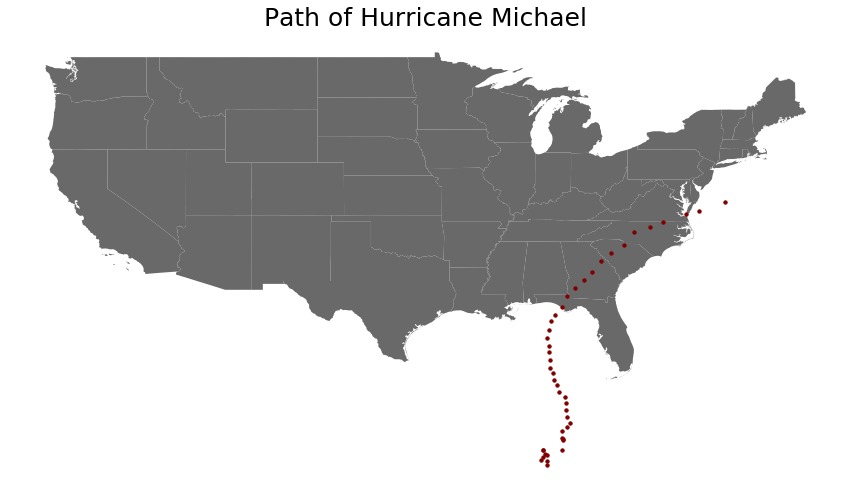

In [43]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax, color = 'dimgrey')

#plot coordinates on top of map graph
geo_hurricane.plot(ax=basemap, color='maroon', marker = '.', markersize=45)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Path of Hurricane Michael", fontsize=25, fontweight=3, color = 'k')